# UK countries average eating habits using Autoencoder

This project is trying to answer the question of **Given a dataset of average eating habits between countries in the UK, does any particular country stand out as different**.

## The Data

 In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/UK_foods.csv', index_col=0)

In [3]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


**Transpose the DataFrame so that the columns are now the index.**

In [4]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**Does any country really stand out as different than the others? It should be tricky to tell just from the image. Do any two countries appear to be very similar?**

We can't really see the clear distinction between countries's food cousumption patterns accordingly to heatmap.

So we will reduce dimensionality using autoencoder.

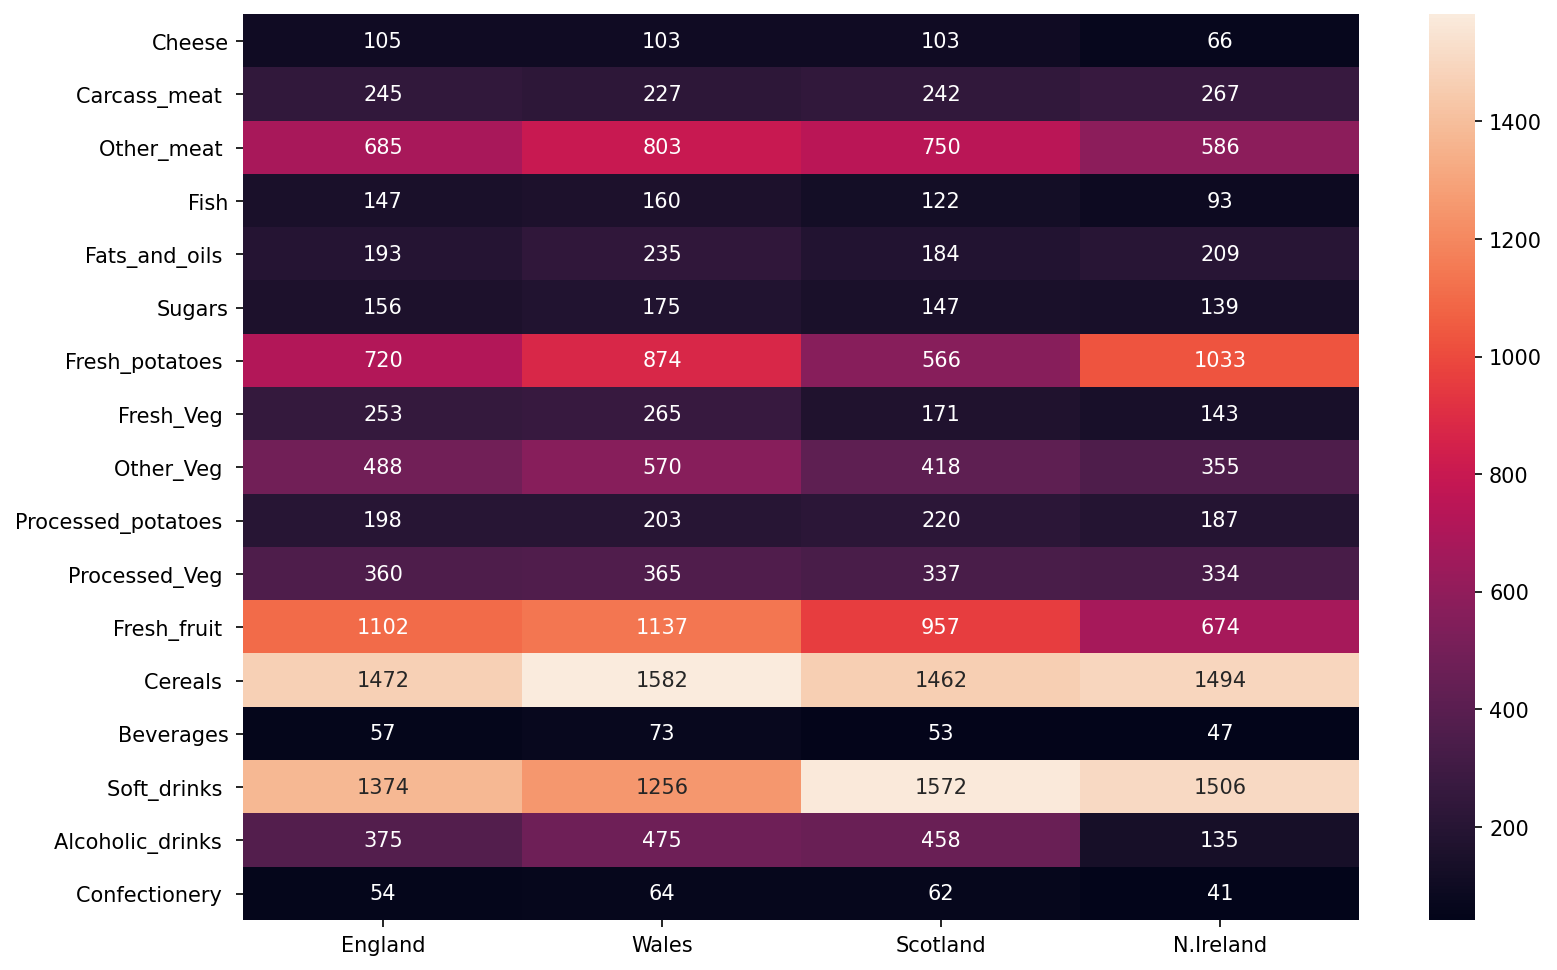

In [36]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df, annot=True, fmt='.0f');

-------

# Building Autoencoder

**Our goal will be to reduce the dimensions from 17 --> 2 and see if any countries stand out as very different.**

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# Encoder

**17 --> 8 --> 4 --> 2**

In [7]:
df.shape

(17, 4)

There are original 17 food items we are trying to reduce the dimensionality.

In [8]:
encoder = Sequential()

encoder.add(Dense(units=8, activation='relu', input_shape=[17])) #17 => 8
encoder.add(Dense(units=4, activation='relu', input_shape=[8])) # 8 => 4
encoder.add(Dense(units=2, activation='relu', input_shape=[4])) # 4 => 2

# Decoder

**2-->4-->8-->17**

In [9]:
decoder = Sequential()

decoder.add(Dense(4, activation='relu', input_shape=[2]))
decoder.add(Dense(8, activation='relu', input_shape=[4]))
decoder.add(Dense(17, activation='relu', input_shape=[8]))

# Combine Encoder + Decoder

**Combine the encoder and decoder to be an autoencoder and compile the model.**

In [10]:
autoencoder = Sequential([encoder, decoder])

In [11]:
autoencoder.compile(optimizer=SGD(lr=1.5), loss='mse')

-----

# Scaling

**MinMaxScaler to scale the transpose the data, since we really have 17 feature columns and only 4 rows (one per country).**

In [12]:
df.transpose().head(2)

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [16]:
# NOTE the shape should be 17 columns by 4 rows.
scaled_df.shape

(4, 17)

In [17]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

----

# Train Autoencoder

In [18]:
autoencoder.fit(scaled_df, scaled_df,
                       epochs=15,
                       verbose=1)

Epoch 1/15
1/1 [==============================] - 1s 509ms/step - loss: 0.3967
Epoch 2/15
1/1 [==============================] - 0s 19ms/step - loss: 0.3217
Epoch 3/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2846
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2767
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2743
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2724
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2718
Epoch 8/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2725
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2774
Epoch 10/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2796
Epoch 11/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2906
Epoch 12/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2700
Epoch 13/15
1/1 [==============================] - 0s 3ms/step - loss:

-----

# Predict Reduced Dimensionalty Output

**Run the scaled data through only the encoder and predict the reduced dimensionalty output**

In [19]:
encoded_2dim_data = encoder.predict(scaled_df)

In [20]:
encoded_2dim_data.shape

(4, 2)

In [21]:
encoded_2dim_data

array([[1.4207909 , 0.        ],
       [2.043561  , 0.        ],
       [1.0964327 , 0.25460047],
       [0.09162079, 0.41580582]], dtype=float32)

------

# Prep Data on Reduced Dimension

**Join the encoded 2 dimensional data with the original countries index. Triple check the index order to make sure its joined correctly. There are many ways to do this with pandas.**

In [22]:
countries_index = df.transpose().index  #same as df.columns result
countries_index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [23]:
results = pd.DataFrame(data=encoded_2dim_data, index=countries_index, columns=['C1', 'C2'])

In [24]:
results

,C1,C2
England,1.420791,0.000000
Wales,2.043561,0.000000
Scotland,1.096433,0.254600
N.Ireland,0.091621,0.415806


In [25]:
results = results.reset_index()

In [26]:
results

,index,C1,C2
0,England,1.420791,0.000000
1,Wales,2.043561,0.000000
2,Scotland,1.096433,0.254600
3,N.Ireland,0.091621,0.415806


------

# plot out these results in a scatterplot, labeled by their respective country.

It seems like Northern Ireland is further away from the other points.

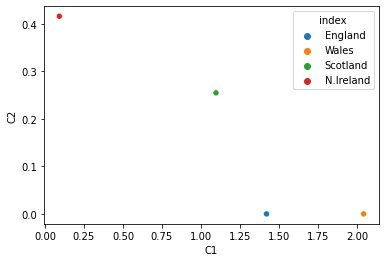

In [27]:
sns.scatterplot(data=results, x='C1', y='C2', hue='index');

 Once we go back and look at the data in the table, this makes sense: the Northern Irish eat way more grams of fresh potatoes and way fewer of fresh fruits, cheese, fish and alcoholic drinks. It's a good sign that structure we've visualized reflects a big fact of real-world geography: Northern Ireland is the only of the four countries not on the island of Great Britain.
 
Other resource on UK [video](https://www.youtube.com/watch?v=rNu8XDBSn10).

In [30]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41
